Hipoteza: Zmienność wskaźnika BSP (Buy Sell Pressure) może służyć jako wczesny sygnał zmian w kierunku trendu na rynku giełdowym, wskazując na momenty, w których presja zakupowa lub sprzedażowa zaczyna dominować, co może prowadzić do przełamań w dotychczasowym kierunku rynku. Obserwacja zmian w wartościach BSP może pomóc w przewidywaniu punktów zwrotnych na rynku, czyli momentów, w których zmienia się ogólny sentyment i tym samym kierunek rynku


In [19]:
import json

with open("../data/data-crypto-BNBUSDT-1m.json", "r") as f:
    data = json.load(f)

print(data[0]) 

{'ts': 1723451340, 'ob_10_p_o': 0.07799999999999996, 'ob_10_p_h': 0.08299999999999996, 'ob_10_p_l': 0.07699999999999996, 'ob_10_p_c': 0.07899999999999996, 'o': 511.7, 'h': 511.7, 'l': 511.3, 'c': 511.3}


Charakterystyka danych pokazanych powyżej:
- ts (timestamp) – Znacznik czasu, reprezentuje moment pobrania danych.
- ob_10_p_o (Order Book 10 poziomów - Open) – Cena otwarcia wskaźnika BSP dla pierwszych 10 poziomów księgi zleceń.
- ob_10_p_h (Order Book 10 poziomów - High) – Najwyższa wartość wskaźnika BSP w danej minucie.
- ob_10_p_l (Order Book 10 poziomów - Low) – Najniższa wartość wskaźnika BSP w danej minucie.
- ob_10_p_c (Order Book 10 poziomów - Close) – Cena zamknięcia wskaźnika BSP dla pierwszych 10 poziomów księgi zleceń.
- o (Open) – Cena otwarcia danej świecy (w danej minucie).
- h (High) – Najwyższa cena w danej minucie.
- l (Low) – Najniższa cena w danej minucie.
- c (Close) – Cena zamknięcia danej świecy.
Dane te są używane do analizy trendów rynkowych oraz potencjalnych sygnałów kupna i sprzedaży na podstawie wskaźnika BSP. Wykorzystujesz je do identyfikacji momentów, w których wskaźnik BSP sugeruje odwrócenie trendu, ale faktycznie do niego nie dochodzi.

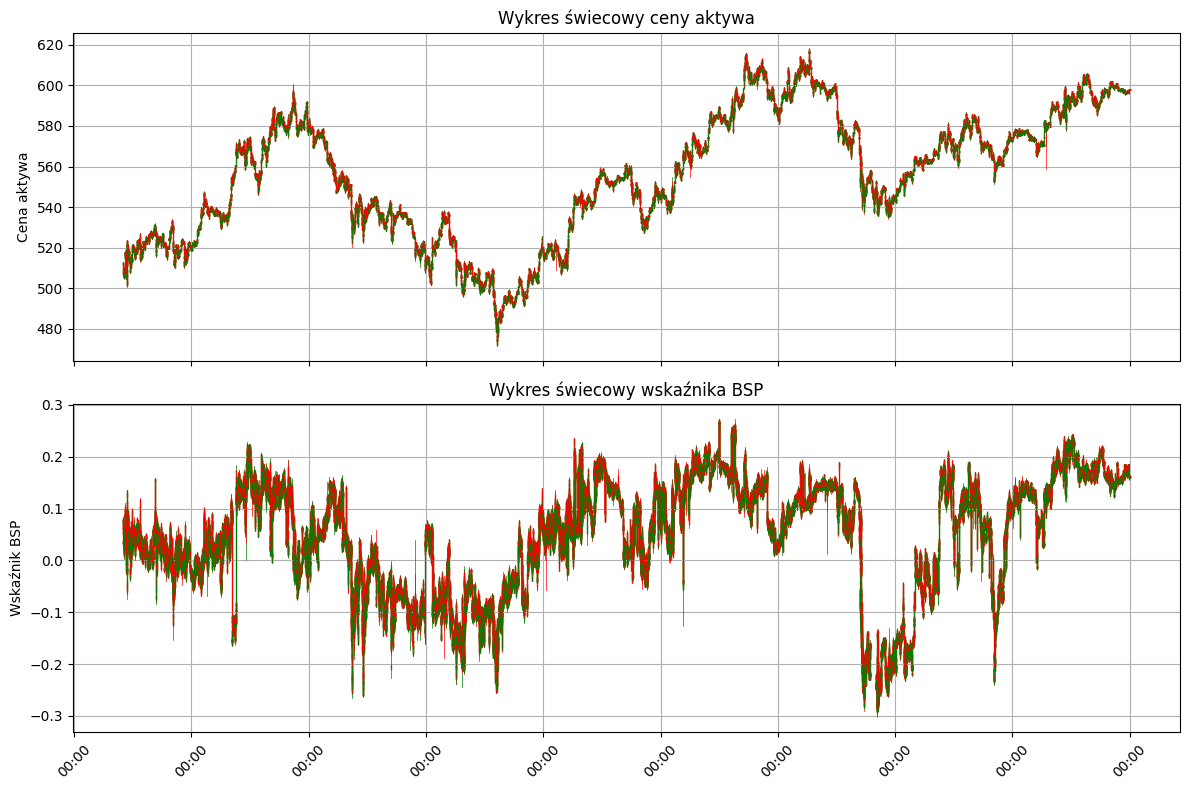

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.ticker as ticker

with open("../data/data-crypto-BNBUSDT-1m.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df["ts"] = pd.to_datetime(df["ts"], unit="s")
df["ts"] = df["ts"].map(mdates.date2num)

# Tworzenie wykresu
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Wykres świecowy dla ceny aktywa
ohlc = df[["ts", "o", "h", "l", "c"]].values
ax1 = axes[0]
candlestick_ohlc(ax1, ohlc, width=0.0005, colorup='g', colordown='r')
ax1.set_ylabel("Cena aktywa")
ax1.set_title("Wykres świecowy ceny aktywa")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.xaxis.set_major_locator(ticker.MaxNLocator(10))
ax1.grid()

# Wykres świecowy dla wskaźnika BSP
bsp_ohlc = df[["ts", "ob_10_p_o", "ob_10_p_h", "ob_10_p_l", "ob_10_p_c"]].values
ax2 = axes[1]
candlestick_ohlc(ax2, bsp_ohlc, width=0.0005, colorup='g', colordown='r')
ax2.set_ylabel("Wskaźnik BSP")
ax2.set_title("Wykres świecowy wskaźnika BSP")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.xaxis.set_major_locator(ticker.MaxNLocator(10))
ax2.grid()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

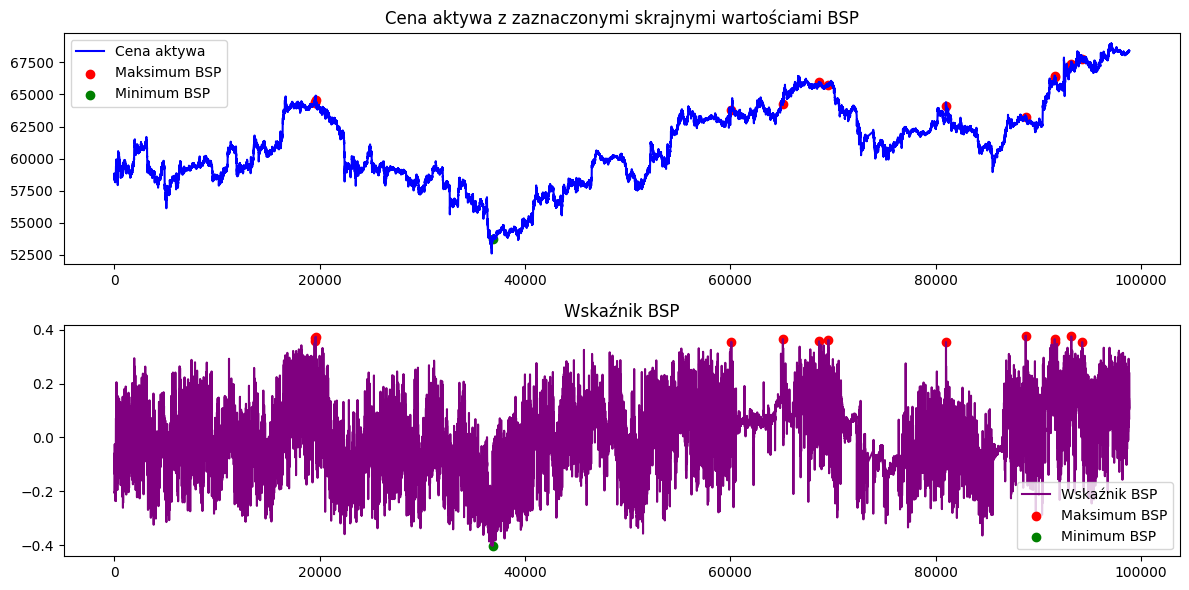

In [7]:
# Parametry analizy
BSP_THRESHOLD = 0.35  # Próg wskaźnika BSP do analizy
LOOKAHEAD_STEPS = 70 # Ilość świec po przekroczeniu progu do analizy

def load_data(file_path):
    with open(file_path, "r") as f:
        return json.load(f)

data = load_data("../data/data-crypto-BTCUSDT-1m.json")
df = pd.DataFrame(data)

df["c"] = pd.to_numeric(df["c"], errors='coerce')
df["ob_10_p_c"] = pd.to_numeric(df["ob_10_p_c"], errors='coerce')

df.dropna(inplace=True)

# Analiza przekroczenia progu BSP (maksimum)
threshold_crossings_max = df[df['ob_10_p_c'] > BSP_THRESHOLD]

# Analiza przekroczenia minimum BSP w danym zakresie
BSP_MIN_RANGE = df['ob_10_p_c'].min()
threshold_crossings_min = df[df['ob_10_p_c'] <= BSP_MIN_RANGE]

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['c'], label="Cena aktywa", color='blue')
plt.scatter(threshold_crossings_max.index, threshold_crossings_max['c'], color='red', label='Maksimum BSP', marker='o')
plt.scatter(threshold_crossings_min.index, threshold_crossings_min['c'], color='green', label='Minimum BSP', marker='o')
plt.legend()
plt.title("Cena aktywa z zaznaczonymi skrajnymi wartościami BSP")

plt.subplot(2, 1, 2)
plt.plot(df.index, df['ob_10_p_c'], label="Wskaźnik BSP", color='purple')
plt.scatter(threshold_crossings_max.index, threshold_crossings_max['ob_10_p_c'], color='red', label='Maksimum BSP', marker='o')
plt.scatter(threshold_crossings_min.index, threshold_crossings_min['ob_10_p_c'], color='green', label='Minimum BSP', marker='o')
plt.legend()
plt.title("Wskaźnik BSP")

plt.tight_layout()
plt.show()



Wykres przedstawia momenty w których wskaźnik BSP wskazuje relatywnie wysoką wartość która może wskazywać na odwrócenie aktualnego trendu

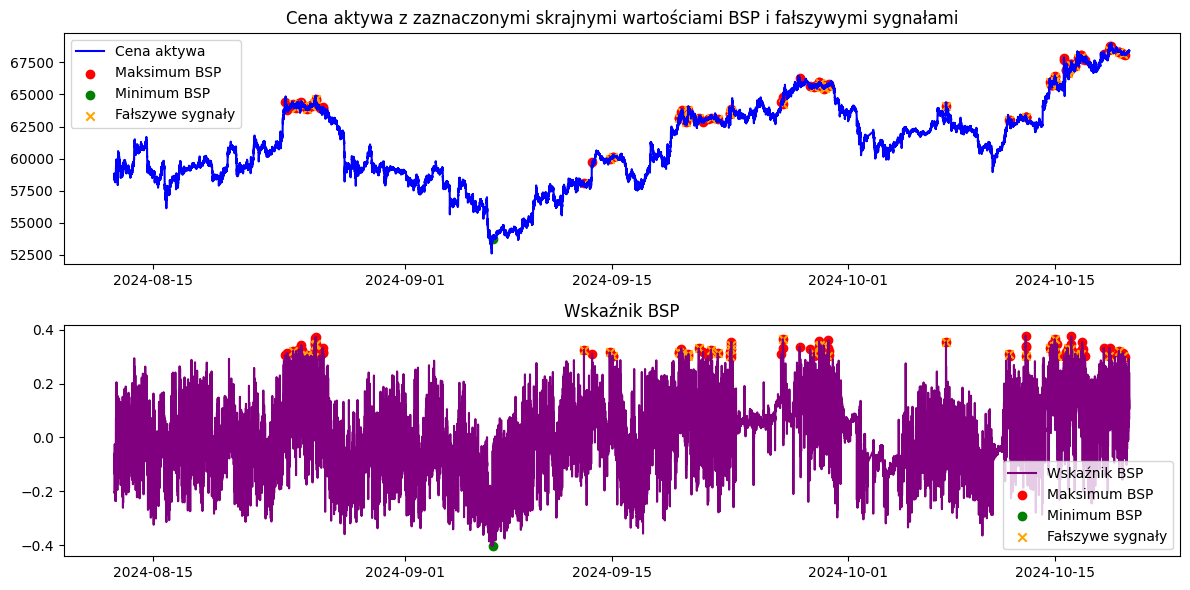

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Parametry analizy
BSP_THRESHOLD = 0.3  # Próg wskaźnika BSP do analizy
LOOKAHEAD_STEPS = 5   # Ilość świec po przekroczeniu progu do analizy

data = load_data("../data/data-crypto-BTCUSDT-1m.json")
df = pd.DataFrame(data)

df["c"] = pd.to_numeric(df["c"], errors='coerce')
df["ob_10_p_c"] = pd.to_numeric(df["ob_10_p_c"], errors='coerce')

df.dropna(inplace=True)

# Analiza przekroczenia progu BSP (maksimum)
threshold_crossings_max = df[df['ob_10_p_c'] > BSP_THRESHOLD]

# Analiza przekroczenia minimum BSP w danym zakresie
BSP_MIN_RANGE = df['ob_10_p_c'].min()
threshold_crossings_min = df[df['ob_10_p_c'] <= BSP_MIN_RANGE]

# Identyfikacja momentów, gdy cena nie zmienia trendu po skrajnych wartościach BSP
false_signals = []
indices = df.index.to_list()

for idx in threshold_crossings_max.index:
    idx_pos = indices.index(idx)
    if idx_pos + LOOKAHEAD_STEPS < len(df):
        future_price = df.iloc[idx_pos + LOOKAHEAD_STEPS]["c"]
        current_price = df.iloc[idx_pos]["c"]
        if (future_price > current_price and df.iloc[idx_pos]["ob_10_p_c"] > BSP_THRESHOLD) or \
           (future_price < current_price and df.iloc[idx_pos]["ob_10_p_c"] <= BSP_MIN_RANGE):
            continue  # Cena zmieniła trend zgodnie z oczekiwaniem
        false_signals.append(idx)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['c'], label="Cena aktywa", color='blue')
plt.scatter(threshold_crossings_max.index, threshold_crossings_max['c'], color='red', label='Maksimum BSP', marker='o')
plt.scatter(threshold_crossings_min.index, threshold_crossings_min['c'], color='green', label='Minimum BSP', marker='o')
plt.scatter(false_signals, df.loc[false_signals, 'c'], color='orange', label='Fałszywe sygnały', marker='x')
plt.legend()
plt.title("Cena aktywa z zaznaczonymi skrajnymi wartościami BSP i fałszywymi sygnałami")

plt.subplot(2, 1, 2)
plt.plot(df.index, df['ob_10_p_c'], label="Wskaźnik BSP", color='purple')
plt.scatter(threshold_crossings_max.index, threshold_crossings_max['ob_10_p_c'], color='red', label='Maksimum BSP', marker='o')
plt.scatter(threshold_crossings_min.index, threshold_crossings_min['ob_10_p_c'], color='green', label='Minimum BSP', marker='o')
plt.scatter(false_signals, df.loc[false_signals, 'ob_10_p_c'], color='orange', label='Fałszywe sygnały', marker='x')
plt.legend()
plt.title("Wskaźnik BSP")

plt.tight_layout()
plt.show()


Wykre pokazuje momenty w których wedug wskaźnika BSP powinno nastąpić odwrócenie trendu a tak się nie stalo